In [4]:
#save the model as .h5

[*********************100%%**********************]  1 of 1 completed


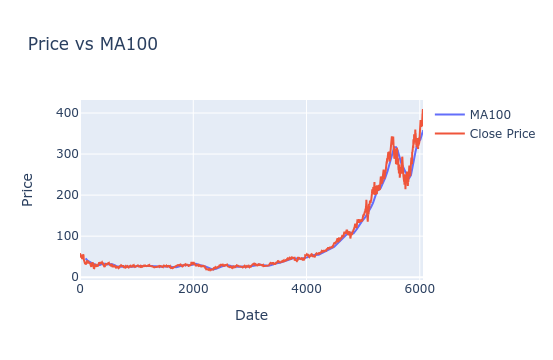

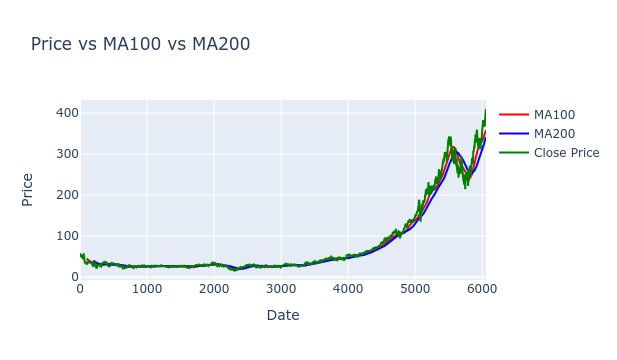

Mean Absolute Error (MAE): 25.6372080529603
Mean Squared Error (MSE): 1178.138067714655


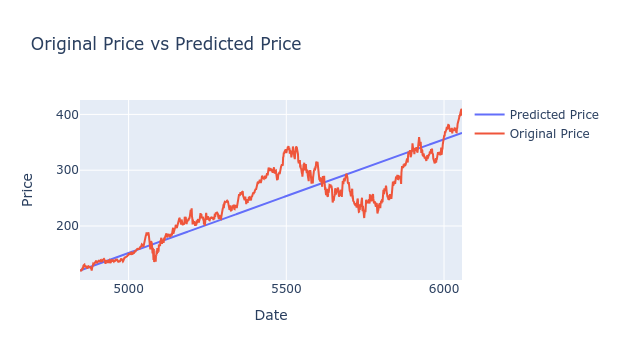

In [5]:
!pip install yfinance
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima.arima import auto_arima
import pickle

start = '2000-01-01'
end = '2024-02-01'
stock = 'MSFT'

data = yf.download(stock, start, end)

data.reset_index(inplace=True)

ma_100_days = data.Close.rolling(100).mean()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=data.index, y=ma_100_days, mode='lines', name='MA100'))
fig1.add_trace(go.Scatter(x=data.index, y=data.Close, mode='lines', name='Close Price'))
fig1.update_layout(title='Price vs MA100', xaxis_title='Date', yaxis_title='Price')
fig1.show()

ma_200_days = data.Close.rolling(200).mean()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data.index, y=ma_100_days, mode='lines', name='MA100', line=dict(color='red')))
fig2.add_trace(go.Scatter(x=data.index, y=ma_200_days, mode='lines', name='MA200', line=dict(color='blue')))
fig2.add_trace(go.Scatter(x=data.index, y=data.Close, mode='lines', name='Close Price', line=dict(color='green')))
fig2.update_layout(title='Price vs MA100 vs MA200', xaxis_title='Date', yaxis_title='Price')
fig2.show()

data.dropna(inplace=True)

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

autoarima_model = auto_arima(data_train, seasonal=False, error_action='ignore', suppress_warnings=True)
forecast = autoarima_model.predict(n_periods=len(data_test))

mae = mean_absolute_error(data_test, forecast)
mse = mean_squared_error(data_test, forecast)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=data.index[-len(data_test):], y=forecast, mode='lines', name='Predicted Price'))
fig3.add_trace(go.Scatter(x=data.index[-len(data_test):], y=data_test.Close, mode='lines', name='Original Price'))
fig3.update_layout(title='Original Price vs Predicted Price', xaxis_title='Date', yaxis_title='Price')
fig3.show()

# Save ARIMA model using pickle
with open('arima_model.pkl', 'wb') as f:
    pickle.dump(autoarima_model, f)


In [ ]:
#save the model as .keras

[*********************100%%**********************]  1 of 1 completed


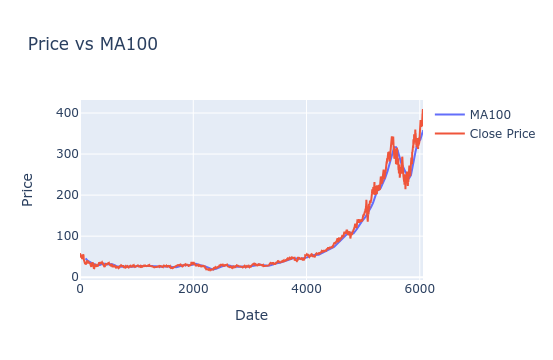

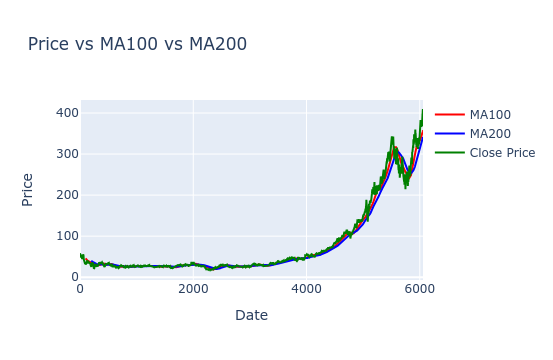

Mean Absolute Error (MAE): 25.6372080529603
Mean Squared Error (MSE): 1178.138067714655


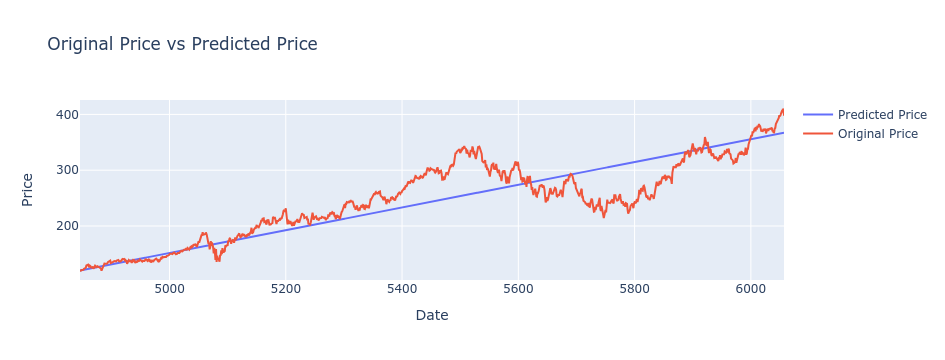

In [7]:
!pip install yfinance
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima.arima import auto_arima
import tensorflow as tf

start = '2000-01-01'
end = '2024-02-01'
stock = 'MSFT'

data = yf.download(stock, start, end)

data.reset_index(inplace=True)

ma_100_days = data.Close.rolling(100).mean()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=data.index, y=ma_100_days, mode='lines', name='MA100'))
fig1.add_trace(go.Scatter(x=data.index, y=data.Close, mode='lines', name='Close Price'))
fig1.update_layout(title='Price vs MA100', xaxis_title='Date', yaxis_title='Price')
fig1.show()

ma_200_days = data.Close.rolling(200).mean()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=data.index, y=ma_100_days, mode='lines', name='MA100', line=dict(color='red')))
fig2.add_trace(go.Scatter(x=data.index, y=ma_200_days, mode='lines', name='MA200', line=dict(color='blue')))
fig2.add_trace(go.Scatter(x=data.index, y=data.Close, mode='lines', name='Close Price', line=dict(color='green')))
fig2.update_layout(title='Price vs MA100 vs MA200', xaxis_title='Date', yaxis_title='Price')
fig2.show()

data.dropna(inplace=True)

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

autoarima_model = auto_arima(data_train, seasonal=False, error_action='ignore', suppress_warnings=True)
forecast = autoarima_model.predict(n_periods=len(data_test))

mae = mean_absolute_error(data_test, forecast)
mse = mean_squared_error(data_test, forecast)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=data.index[-len(data_test):], y=forecast, mode='lines', name='Predicted Price'))
fig3.add_trace(go.Scatter(x=data.index[-len(data_test):], y=data_test.Close, mode='lines', name='Original Price'))
fig3.update_layout(title='Original Price vs Predicted Price', xaxis_title='Date', yaxis_title='Price')
fig3.show()

# Save ARIMA model using TensorFlow/Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)), # Input layer
    tf.keras.layers.Dense(64, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1) # Output layer
])

model.compile(optimizer='adam', loss='mse') # Compile the model

# Train the model
model.fit(np.arange(len(data_train)), data_train.values, epochs=100, verbose=0)

# Save the model
model.save("arima_model.keras")
